In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
128424,2020-05-09,Antrim,Michigan,26009.0,10,0
228911,2020-06-11,Bristol,Massachusetts,25005.0,7793,492
105735,2020-05-01,Champaign,Ohio,39021.0,14,1
461397,2020-08-23,Mason,Michigan,26105.0,114,0
416654,2020-08-09,Howard,Nebraska,31093.0,55,4
333518,2020-07-14,Butler,Ohio,39017.0,1942,47
263093,2020-06-22,Lafayette,Louisiana,22055.0,1440,33
63467,2020-04-16,Valencia,New Mexico,35061.0,24,0
116940,2020-05-05,Pierce,Nebraska,31139.0,2,0
154230,2020-05-17,Uinta,Wyoming,56041.0,10,0


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
178183,2020-05-25,Albemarle,Virginia,51003.0,149,8,1.0,1.43
427517,2020-08-12,Albemarle,Virginia,51003.0,856,16,8.0,9.29
331191,2020-07-13,Charlottesville city,Virginia,51540.0,285,7,9.0,6.86
343956,2020-07-17,Albemarle,Virginia,51003.0,593,10,10.0,10.43
404993,2020-08-05,Charlottesville city,Virginia,51540.0,504,13,0.0,8.71
456559,2020-08-21,Albemarle,Virginia,51003.0,943,16,13.0,8.57
80969,2020-04-22,Charlottesville city,Virginia,51540.0,44,2,3.0,0.86
202704,2020-06-02,Charlottesville city,Virginia,51540.0,128,3,3.0,5.43
382475,2020-07-29,Charlottesville city,Virginia,51540.0,443,8,2.0,10.29
430745,2020-08-13,Albemarle,Virginia,51003.0,869,16,13.0,10.14


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
461,".Henry County, Georgia",234561.0,Henry,Georgia
285,".Moffat County, Colorado",13283.0,Moffat,Colorado
1997,".Burleigh County, North Dakota",95626.0,Burleigh,North Dakota
325,".Broward County, Florida",1952778.0,Broward,Florida
89,".Sitka City and Borough, Alaska",8493.0,Sitka City and Borough,Alaska
901,".Clay County, Kansas",8002.0,Clay,Kansas
2249,".Berks County, Pennsylvania",421164.0,Berks,Pennsylvania
824,".Fremont County, Iowa",6960.0,Fremont,Iowa
2326,".Cherokee County, South Carolina",57300.0,Cherokee,South Carolina
2185,".Oklahoma County, Oklahoma",797434.0,Oklahoma,Oklahoma


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
150,2020-08-18,Albemarle,Virginia,51003.0,916,16,3.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
151,2020-08-19,Albemarle,Virginia,51003.0,921,16,5.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
152,2020-08-20,Albemarle,Virginia,51003.0,930,16,9.0,8.71,".Albemarle County, Virginia",109330.0,7.966706
153,2020-08-21,Albemarle,Virginia,51003.0,943,16,13.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
154,2020-08-22,Albemarle,Virginia,51003.0,955,16,12.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
155,2020-08-23,Albemarle,Virginia,51003.0,961,16,6.0,7.86,".Albemarle County, Virginia",109330.0,7.189244
156,2020-08-24,Albemarle,Virginia,51003.0,963,16,2.0,7.14,".Albemarle County, Virginia",109330.0,6.530687
157,2020-08-25,Albemarle,Virginia,51003.0,975,16,12.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
158,2020-08-26,Albemarle,Virginia,51003.0,980,17,5.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
159,2020-08-27,Albemarle,Virginia,51003.0,990,17,10.0,8.57,".Albemarle County, Virginia",109330.0,7.838654


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
314,2020-08-18,Charlottesville city,Virginia,51540.0,561,15,1.0,2.14,".Charlottesville city, Virginia",47266.0,4.527567
315,2020-08-19,Charlottesville city,Virginia,51540.0,566,14,5.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
316,2020-08-20,Charlottesville city,Virginia,51540.0,570,14,4.0,2.29,".Charlottesville city, Virginia",47266.0,4.844920
317,2020-08-21,Charlottesville city,Virginia,51540.0,575,14,5.0,2.86,".Charlottesville city, Virginia",47266.0,6.050861
318,2020-08-22,Charlottesville city,Virginia,51540.0,584,14,9.0,3.71,".Charlottesville city, Virginia",47266.0,7.849194
319,2020-08-23,Charlottesville city,Virginia,51540.0,588,16,4.0,4.00,".Charlottesville city, Virginia",47266.0,8.462743
320,2020-08-24,Charlottesville city,Virginia,51540.0,589,16,1.0,4.14,".Charlottesville city, Virginia",47266.0,8.758939
321,2020-08-25,Charlottesville city,Virginia,51540.0,592,17,3.0,4.43,".Charlottesville city, Virginia",47266.0,9.372488
322,2020-08-26,Charlottesville city,Virginia,51540.0,595,17,3.0,4.14,".Charlottesville city, Virginia",47266.0,8.758939
323,2020-08-27,Charlottesville city,Virginia,51540.0,604,17,9.0,4.86,".Charlottesville city, Virginia",47266.0,10.282232


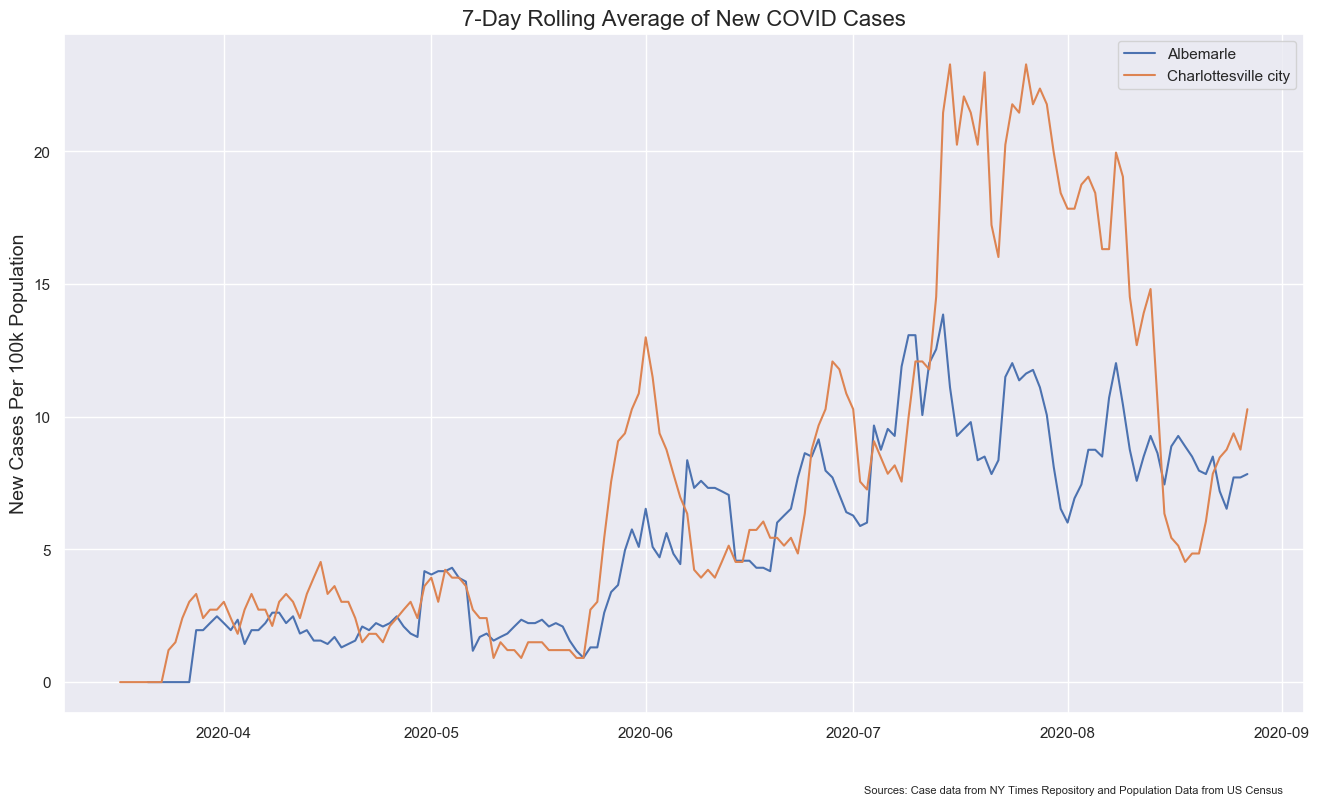

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')